In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The plant pathology challenge is to classifiy apple leaves according to their image. Leaves can be classified as "healthy", "multiple diseases", "scab", and "rust". In this notebook i model the multi classification problem using transfer learning. Along the way are short discussions of tensorflow API concepts and how to use them.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import cv2
from tqdm import tqdm_notebook as tqdm
import os
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

#torch
import torch
from torch import optim
import torchvision
from torchvision import transforms, models
import torch.nn as nn
import torch.utils.data as Data

#Augmentation
import albumentations as A
from albumentations.pytorch import ToTensorV2



In [4]:
root = "/kaggle/input/plant-pathology-2020-fgvc7/"
train_data = pd.read_csv(os.path.join(root,"train.csv"))
test_data = pd.read_csv(os.path.join(root,"test.csv"))
train_data

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


Row's are in order of ['healthy', 'multiple_diseases', 'rust', 'scab']


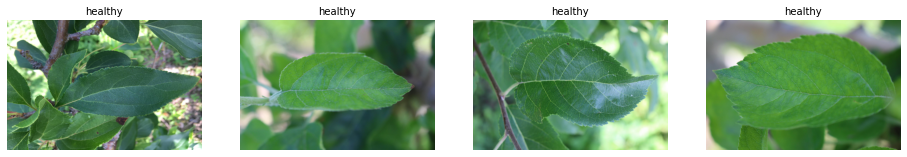

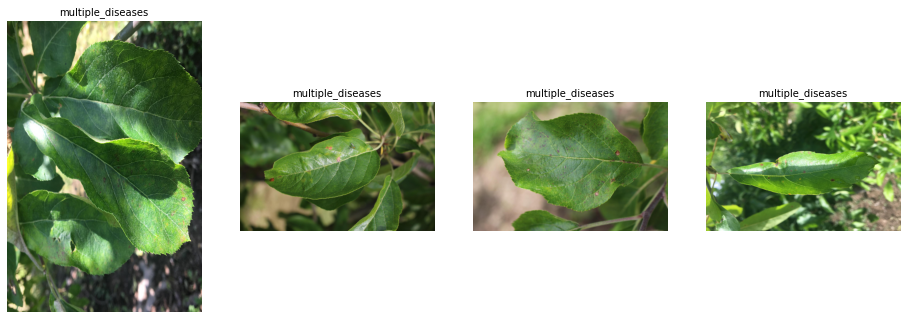

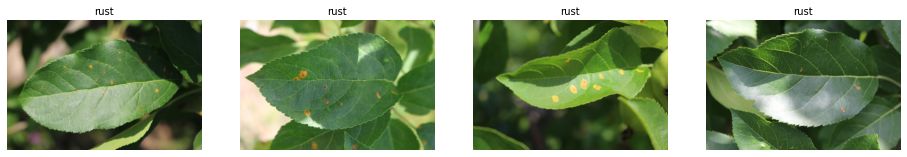

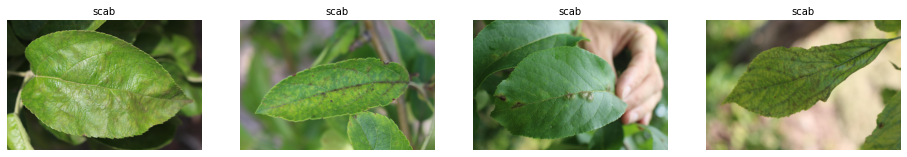

In [15]:
def ShowImages(images, typ):
    fig = figure(figsize=(16,12))
    number_of_images = len(images)
    for i in range(number_of_images):
        a=fig.add_subplot(1,number_of_images,i+1)
        a.set_title(typ, fontsize = 10)
        image = imread(os.path.join(root,"images",images[i]))
        imshow(image)
        axis('off')
        
col=["healthy","multiple_diseases","rust","scab"]
print("Row's are in order of", col)

for column in col:
    images = (train_data[train_data[column].apply(lambda x: x == 1)]["image_id"].sample(4).values) + ".jpg"
    ShowImages(images, column)

In [8]:
print(train_data.shape)
print(test_data.shape)

(1821, 5)
(1821, 1)
